In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def generate_images(_batch_size=32, _img_height=224, _img_width=224):
    # Define the paths to your training and testing data
    train_data_dir = 'dataset/train'
    test_data_dir = 'dataset/test'

    # Set up an ImageDataGenerator for preprocessing and data augmentation
    datagen = ImageDataGenerator(
        rescale=1./255,        # Normalize pixel values to be between 0 and 1
        shear_range=0.2,        # Shear transformations
        zoom_range=0.2,         # Zoom transformations
        horizontal_flip=True    # Horizontal flips
    )

 


    # Create a flow from the training data directory
    _train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(_img_height, _img_width),
        batch_size=_batch_size,
        class_mode='binary'  # 'categorical' for multi-class classification
    )

    _test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(_img_height, _img_width),
        batch_size=_batch_size,
        class_mode='binary'  # 'categorical' for multi-class classification
    )
    return _train_generator, _test_generator



In [2]:
import matplotlib.pyplot as plt

def plot_results(hist, test_loss,test_acc):
        
    # Plot training & validation accuracy values 
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.legend()
    plt.show()
    
    
    # Now show accuracy on the test set
   
    print('Test accuracy:', test_acc , test_loss)
    

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Create a function to build and train the model
def train_and_evaluate_model(learning_rate, _img_height=224, _img_width=224):
    # Define the model
    model = Sequential()
    model.add(Flatten(input_shape=(_img_height, _img_width, 3)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with the specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    # Fit the model
    model_var = model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=[early_stopping])

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(test_generator)
    print(f'Test accuracy with learning rate {learning_rate}: {test_acc}')

    # Return the test accuracy, model object, test loss value for record-keeping
    return model_var , test_acc , test_loss



In [4]:
# Define a list of learning rates to try
learning_rates = [0.001, 0.01, 0.1]

In [5]:
# Set the batch size and image dimensions
batch_size = 32
img_height, img_width = 224, 224  # Adjust these dimensions based on my images

In [6]:
train_generator, test_generator = generate_images(batch_size,_img_height=img_height, _img_width=img_width)

Found 161 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


Epoch 1/10
6/6 [==============================] - 5s 669ms/step - loss: 13.1559 - accuracy: 0.5404 - val_loss: 19.5451 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 4s 603ms/step - loss: 18.1552 - accuracy: 0.4969 - val_loss: 13.1063 - val_accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 22.3740 - accuracy: 0.4907 - val_loss: 16.5177 - val_accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 18.5836 - accuracy: 0.4907 - val_loss: 5.7210 - val_accuracy: 0.5000
Epoch 5/10
6/6 [==============================] - 8s 2s/step - loss: 4.8220 - accuracy: 0.5155 - val_loss: 3.3828 - val_accuracy: 0.4545
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 4.2096 - accuracy: 0.5155 - val_loss: 8.1728 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 7.9616 - accuracy: 0.4907 - val_loss: 8.0489 - val_accuracy: 0.5000
Epoch 8/10
1/1 [============

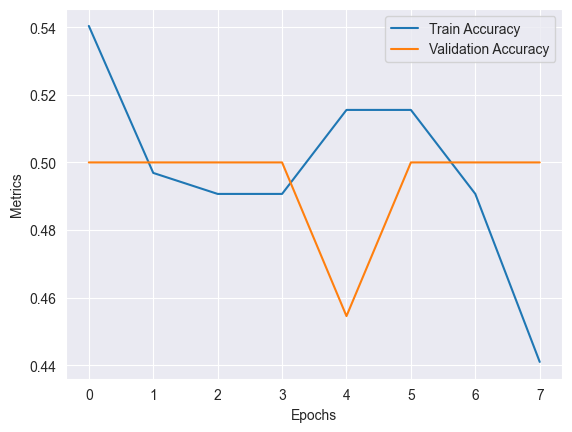

Test accuracy: 0.5 4.843238353729248
Epoch 1/10
6/6 [==============================] - 10s 1s/step - loss: 653.1194 - accuracy: 0.5031 - val_loss: 98.0092 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 128.4591 - accuracy: 0.5280 - val_loss: 162.0208 - val_accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 8s 2s/step - loss: 156.9096 - accuracy: 0.4907 - val_loss: 79.4657 - val_accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 8s 2s/step - loss: 224.1003 - accuracy: 0.4907 - val_loss: 39.8082 - val_accuracy: 0.5000
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 21.4323 - accuracy: 0.5217 - val_loss: 11.6265 - val_accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 31.7014 - accuracy: 0.4969 - val_loss: 10.4033 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 12.5055 - accuracy: 0.4969 - val_loss: 6.1416 - val_ac

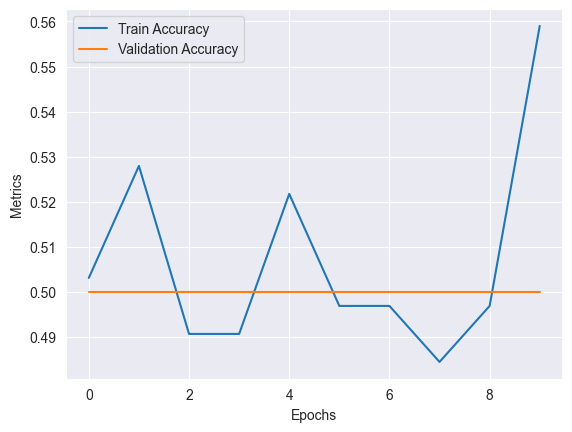

Test accuracy: 0.5 5.122467517852783
Epoch 1/10
6/6 [==============================] - 11s 2s/step - loss: 87222.8047 - accuracy: 0.5031 - val_loss: 1683.2738 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 8869.9795 - accuracy: 0.4969 - val_loss: 1412.3094 - val_accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 1983.3049 - accuracy: 0.5031 - val_loss: 71.1236 - val_accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 17.8538 - accuracy: 0.4969 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 544.1722 - accuracy: 0.4907 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 0.6938 - accuracy: 0.4969 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 1.6057 - accuracy: 0.4969 - val_loss: 0.6932 - val_

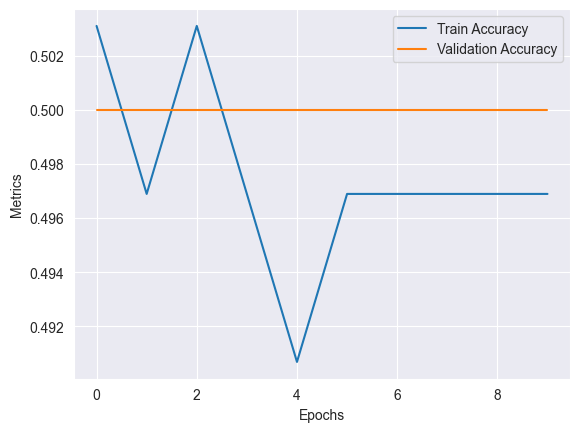

Test accuracy: 0.5 0.6960592269897461


In [7]:
# Train and evaluate the model for different learning rates
results = {}
for lr in learning_rates:
    history, accuracy , loss  = train_and_evaluate_model(lr)
    results[lr] = accuracy
    
    plot_results(history, loss, accuracy)
    
    

    

In [8]:

# Print the results
print("Results:")
for lr, acc in results.items():
    print(f'Learning Rate {lr}: Test Accuracy {acc}')

Results:
Learning Rate 0.001: Test Accuracy 0.5
Learning Rate 0.01: Test Accuracy 0.5
Learning Rate 0.1: Test Accuracy 0.5
